## Exploratory Data Analysis
#### Dataset: SuperStore
####                                        Tanmay Bhalavi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Superstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Pre-Processing Data

In [5]:
df = df.drop(["Country"]  , axis = 1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
new_df =  df.sort_values(by='Sales',ascending=False)

In [10]:
new_df.duplicated(subset=None, keep='first').sum()

0

In [11]:
import seaborn as sns
sns.set_style("whitegrid")

In [12]:
new_df['z'] = (new_df.Sales-new_df.Sales.mean())/new_df.Sales.std()

In [13]:
new_df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.926827
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.688325
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.076861
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.587690
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.465398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Same Day,Corporate,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016,-0.367589
4711,Same Day,Consumer,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964,-0.367627
8658,Standard Class,Corporate,Chicago,Illinois,60623,Central,Office Supplies,Binders,0.836,1,0.8,-1.3376,-0.367653
9292,Same Day,Corporate,Waco,Texas,76706,Central,Office Supplies,Binders,0.556,1,0.8,-0.9452,-0.368102


In [14]:
new_df = new_df[new_df['z'] < 3]

In [15]:
new_df = new_df.drop(["z"]  , axis = 1)

In [16]:
new_df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6467,Standard Class,Home Office,Providence,Rhode Island,2908,East,Office Supplies,Storage,2079.400,5,0.0,582.2320
949,Standard Class,Home Office,Philadelphia,Pennsylvania,19120,East,Furniture,Tables,2065.320,12,0.4,-619.5960
3628,Standard Class,Consumer,Seattle,Washington,98103,West,Office Supplies,Binders,2060.744,7,0.2,643.9825
3043,Same Day,Home Office,Long Beach,California,90805,West,Furniture,Chairs,2054.272,8,0.2,256.7840
8168,Standard Class,Home Office,Seattle,Washington,98105,West,Furniture,Tables,2036.860,7,0.0,366.6348
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Same Day,Corporate,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016
4711,Same Day,Consumer,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964
8658,Standard Class,Corporate,Chicago,Illinois,60623,Central,Office Supplies,Binders,0.836,1,0.8,-1.3376
9292,Same Day,Corporate,Waco,Texas,76706,Central,Office Supplies,Binders,0.556,1,0.8,-0.9452


### Exploratory Data Analysis

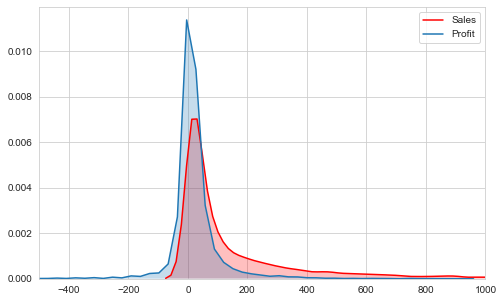

In [17]:
plt.figure(figsize = (8,5))
sns.kdeplot(new_df['Sales'] , color = 'red' , label = 'Sales',bw=25, shade=True)
sns.kdeplot(new_df['Profit'] , label = 'Profit', bw=20, shade=True)
plt.xlim([-500, 1000])
plt.legend()

###### Profit is more than that of sale but there are some areas where profit could be increased

In [18]:
new_df = new_df.drop(['Postal Code'] , axis = 1)

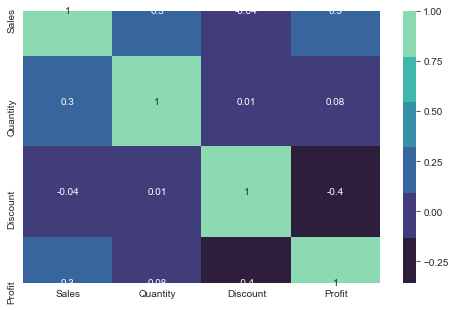

In [19]:
plt.figure(figsize = (8,5))
mp = sns.color_palette('mako')
sns.heatmap(new_df.corr(),annot=True , cmap = mp,fmt='.1g')

###### With increase in Sales, Profit is increasing
###### With increase in Quantity, Profit is increasing
###### With increase in Discount, Profit is decreasing

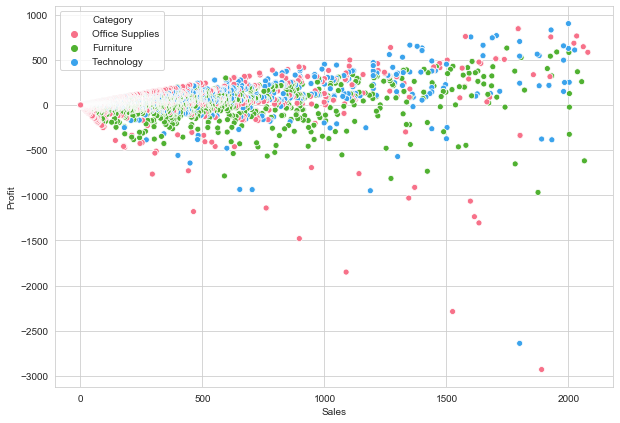

In [21]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = new_df , x = 'Sales' , y = 'Profit' , hue = 'Category' , palette= 'husl' )

##### Office Supplies giving most negative profit

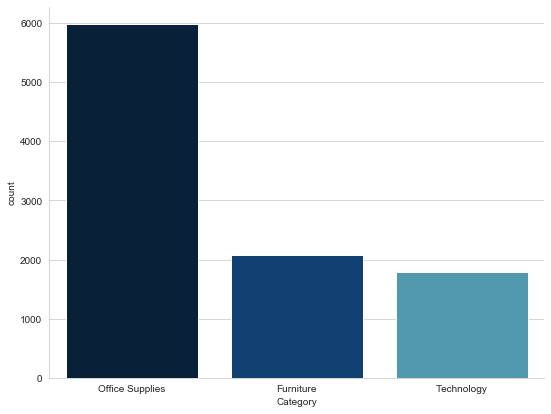

In [22]:
sns.catplot(x = 'Category', kind = 'count' , palette= 'ocean' , data = new_df)
plt.gcf().set_size_inches(8,6)
plt.show()

In [23]:
Office_supp = pd.DataFrame(new_df[new_df['Category'] == "Office Supplies"])

###### Sales of Blinders are not going well with the most loss followed by Appliances

<Figure size 576x360 with 0 Axes>

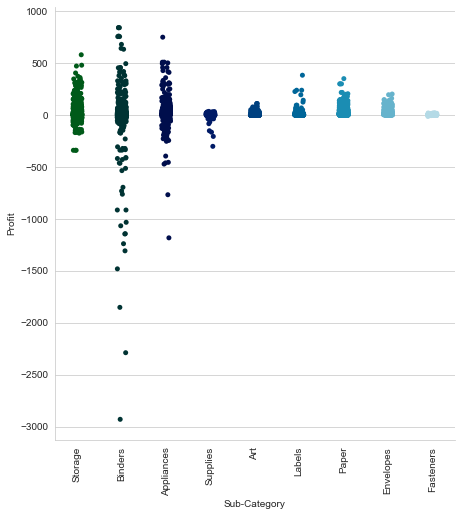

In [24]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Sub-Category', y = 'Profit' , palette= 'ocean' , data = Office_supp)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(7,7)
plt.show()

<Figure size 576x360 with 0 Axes>

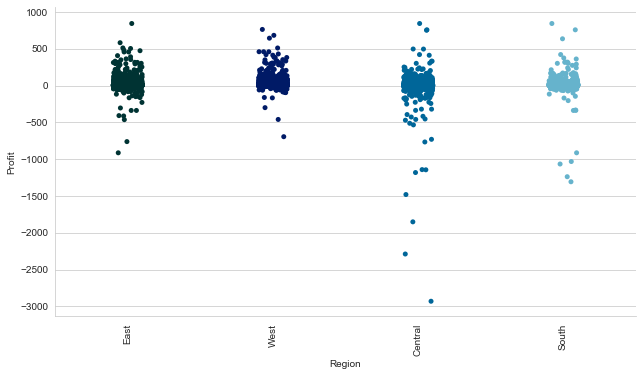

In [25]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Region', y = 'Profit' , palette= 'ocean' , data = Office_supp)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

###### Office Supplies are not doing good at Central region followed by South region

In [26]:
Furnit = pd.DataFrame(new_df[new_df['Category'] == "Furniture"])

##### Tables are giving most negative profit followed by Bookcase and Furnishing

<Figure size 576x360 with 0 Axes>

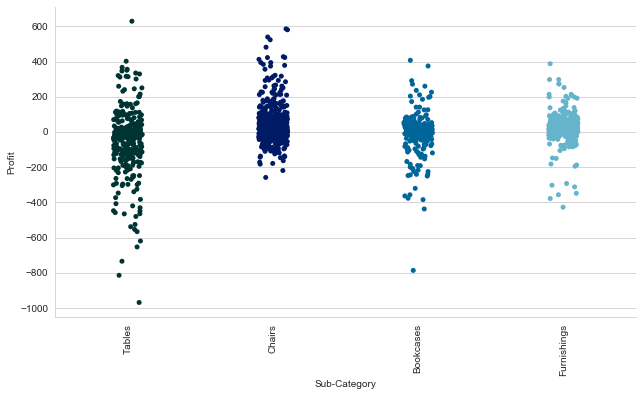

In [27]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Sub-Category', y = 'Profit' , palette= 'ocean' , data = Furnit)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

###### Furniture sales are not going well at all the regions with worst in West region

<Figure size 576x360 with 0 Axes>

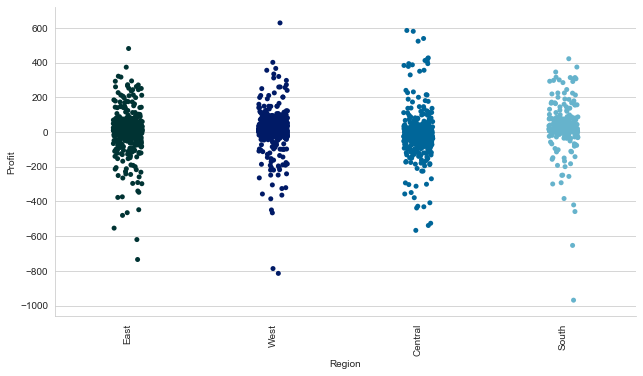

In [28]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Region', y = 'Profit' , palette= 'ocean' , data = Furnit)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

In [29]:
Tech = pd.DataFrame(new_df[new_df['Category'] == "Technology"])

##### Only Machine has the negative profit of more than 2500 and can be ignored considering it to be an outlier

<Figure size 576x360 with 0 Axes>

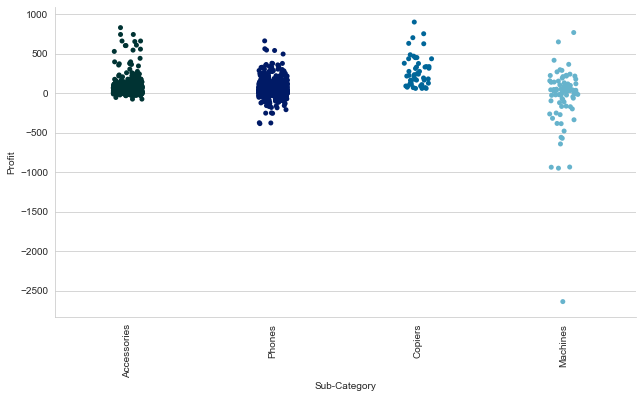

In [30]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Sub-Category', y = 'Profit' , palette= 'ocean' , data = Tech)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

###### East region's sales are not good for Technology

<Figure size 576x360 with 0 Axes>

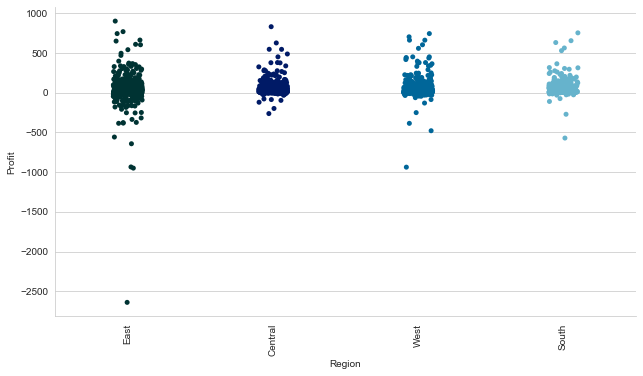

In [31]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Region', y = 'Profit' , palette= 'ocean' , data = Tech)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

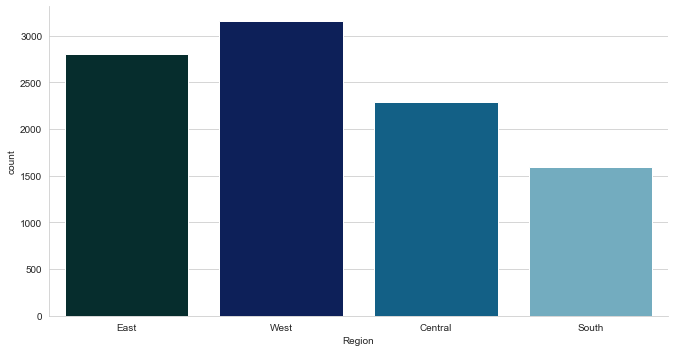

In [32]:
%matplotlib inline
sns.catplot(x = 'Region', kind = 'count' , palette= 'ocean' , data = new_df )
plt.gcf().set_size_inches(10,5)
plt.show()

#### Most number of sales are in the West region

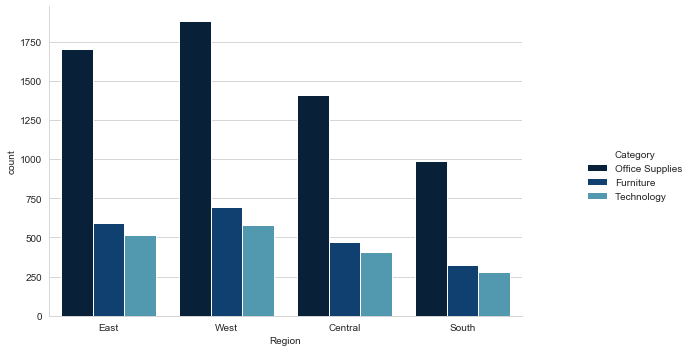

In [33]:
sns.catplot(x = 'Region', kind = 'count', hue = 'Category' , palette= 'ocean' , data = new_df)
plt.gcf().set_size_inches(10,5)
plt.show()

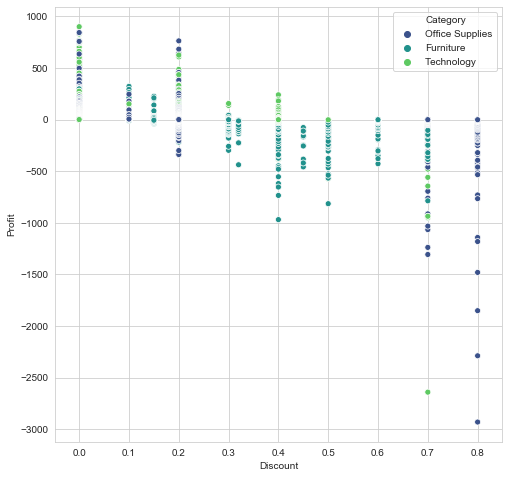

In [34]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = new_df , x = 'Discount'  , y = 'Profit'  , hue = 'Category',palette='viridis')
plt.show()

###### While giving more dicount, sales of Office supplies are going in more loss and Furniture and Technology also not performing well with the discount

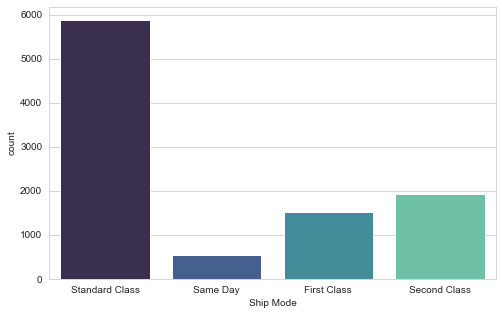

In [34]:
plt.figure(figsize = (8,5))
sns.countplot(data = new_df , x = 'Ship Mode', palette= 'mako')
plt.show()

#### Shipping mode could also affect the Sales and Profit

<Figure size 576x360 with 0 Axes>

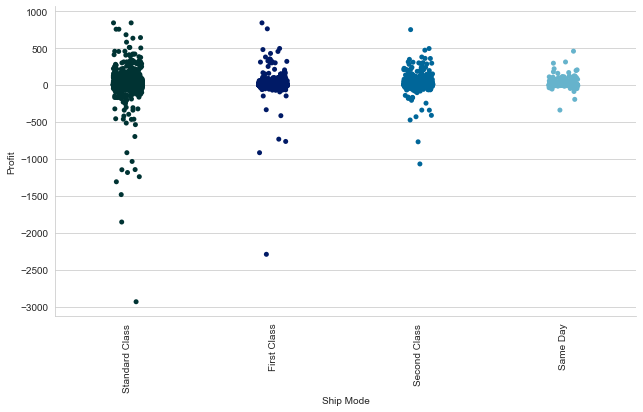

In [35]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Ship Mode', y = 'Profit' , palette= 'ocean' , data = Office_supp)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

#### Office supplies when delivered via Standard Class and First Class giving more negative Profit

<Figure size 576x360 with 0 Axes>

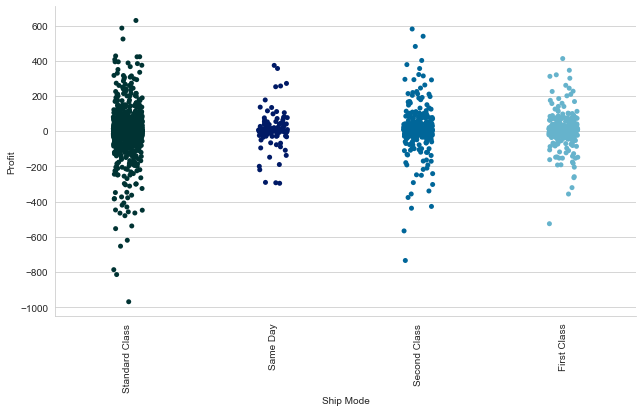

In [36]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Ship Mode', y = 'Profit' , palette= 'ocean' , data = Furnit)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

#### Furnitures when supplied via Standard Class giving most negative profit followed by Second Class and First Class

<Figure size 576x360 with 0 Axes>

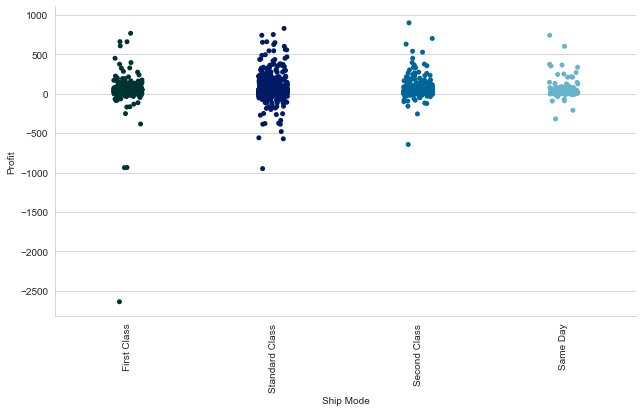

In [37]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Ship Mode', y = 'Profit' , palette= 'ocean' , data = Tech)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

#### Standard Class giving most number of negative Profit while First Class shipping mode have an outlier

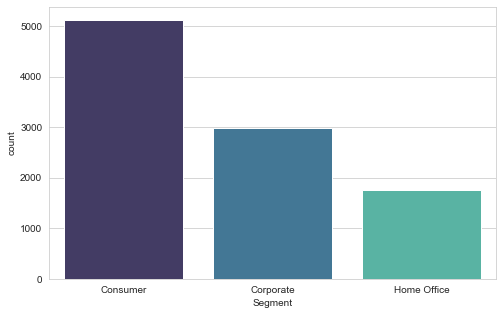

In [38]:
plt.figure(figsize = (8,5))
sns.countplot(data = new_df , x = 'Segment'  , palette= 'mako' , order = new_df.Segment.value_counts().sort_values(ascending= False).index ) 
plt.show()

<Figure size 576x360 with 0 Axes>

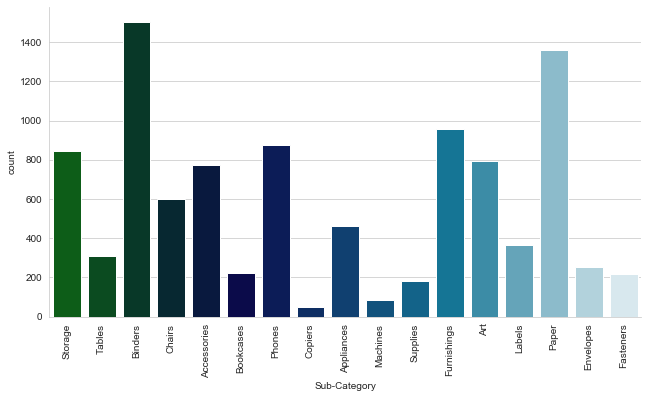

In [39]:
plt.figure(figsize=(8,5))
sns.catplot(x = 'Sub-Category', kind = 'count' , palette= 'ocean' , data = new_df)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

###### Blinders, Papers and Furnishings have the most number of Sales

In [40]:
y = list(new_df.City.value_counts())
x = list(new_df.City.value_counts().index)

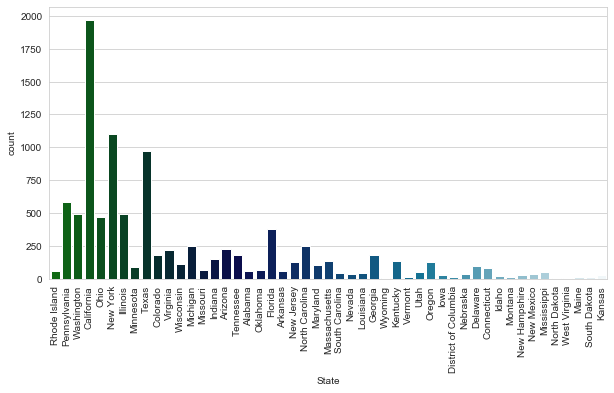

In [41]:
plt.figure(figsize=(10,6))
#sns.color_palette("mako", as_cmap=True)
sns.countplot(x=new_df["State"] , palette= 'ocean')
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

#### California, New York and Texas has the most number of sales

In [42]:
grouped_df = new_df.groupby('City')

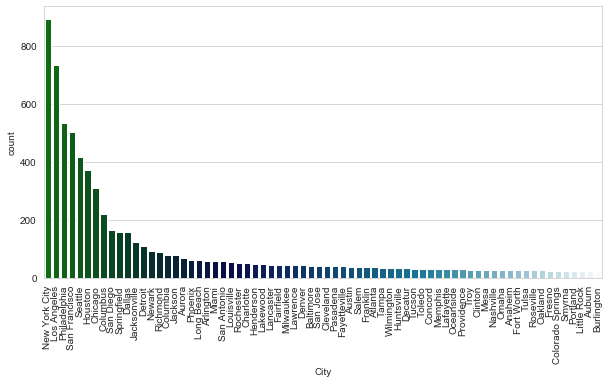

In [43]:
#sns.color_palette("mako", as_cmap=True)
sns.countplot(x=new_df["City"],order=(new_df['City'].value_counts().head(70)).index , palette= 'ocean')
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.show()

#### New York City, Los Angeles, Philadelphia, Sanfransisco, Seattle, Houstan, Chicago, Columbus, SanDiego and Springfield are top 10 sale making Cities

In [44]:
lst_city = ['New York City','Los Angeles', 'Philadelphia', 'San Francisco', 'Seattle']
x = pd.DataFrame(grouped_df.get_group(lst_city[0]))

In [45]:
for i in range(1, len(lst_city)):
    x = pd.concat([x, grouped_df.get_group(lst_city[i])] , axis = 0)

<Figure size 1008x432 with 0 Axes>

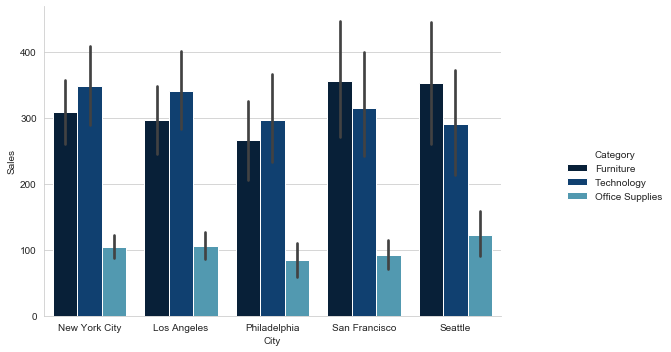

In [46]:
plt.figure(figsize=(14,6))
sns.catplot(data = x , x = 'City' , y = 'Sales' , hue = 'Category' , kind = 'bar' , palette= 'ocean')
plt.gcf().set_size_inches(10,5)
plt.show()

#### Office supplies has the most number of sales overall, but has the least number of sales in the top 5 cities

In [47]:
new_df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6467,Standard Class,Home Office,Providence,Rhode Island,East,Office Supplies,Storage,2079.400,5,0.0,582.2320
949,Standard Class,Home Office,Philadelphia,Pennsylvania,East,Furniture,Tables,2065.320,12,0.4,-619.5960
3628,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,2060.744,7,0.2,643.9825
3043,Same Day,Home Office,Long Beach,California,West,Furniture,Chairs,2054.272,8,0.2,256.7840
8168,Standard Class,Home Office,Seattle,Washington,West,Furniture,Tables,2036.860,7,0.0,366.6348


In [48]:
df1 = new_df.groupby(['Category'])['Sales','Profit'].sum().reset_index()
df1.head()

,Category,Sales,Profit
0,Furniture,643351.3987,14180.5464
1,Office Supplies,594047.0720,90137.4134
2,Technology,543164.3200,86961.0770


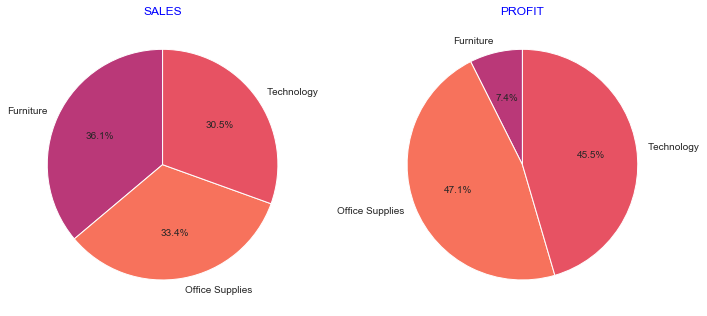

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("magma")
colors = cmap([130,180,160])
plt.gcf().set_size_inches(10,5)

ax1.pie(df1["Sales"], labels= df1.Category, autopct='%1.1f%%',startangle=90 , colors = colors)
ax1.set_title('SALES' , color = 'blue')
ax2.pie(df1["Profit"], labels= df1.Category, autopct='%1.1f%%',startangle=90 , colors = colors)
ax2.set_title('PROFIT' , color = 'blue')
fig.tight_layout()
plt.show()

In [50]:
df2 = new_df.groupby(['Category'])['Profit' , 'Discount'].sum().reset_index()
df2.head()

,Category,Profit,Discount
0,Furniture,14180.5464,364.12
1,Office Supplies,90137.4134,943.20
2,Technology,86961.0770,235.40


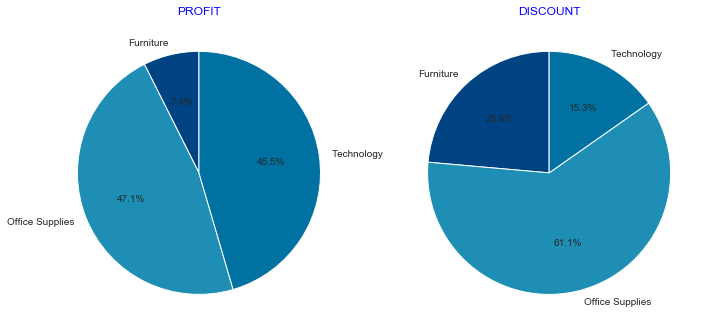

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("ocean")
colors = cmap([130,180,160])
plt.gcf().set_size_inches(10,5)

ax1.pie(df2["Profit"], labels= df2.Category, autopct='%1.1f%%',startangle=90 , colors = colors)
ax1.set_title('PROFIT' , color = 'blue')
ax2.pie(df2["Discount"], labels= df2.Category, autopct='%1.1f%%',startangle=90 , colors = colors)
ax2.set_title('DISCOUNT' , color = 'blue')
fig.tight_layout()
plt.show()

In [52]:
df3 = new_df.groupby(['Region'])['Profit' , 'Discount'].sum().reset_index()
df3.head()

,Region,Profit,Discount
0,Central,15768.6436,553.62
1,East,53808.4599,409.30
2,South,37838.8593,235.65
3,West,83863.0740,344.15


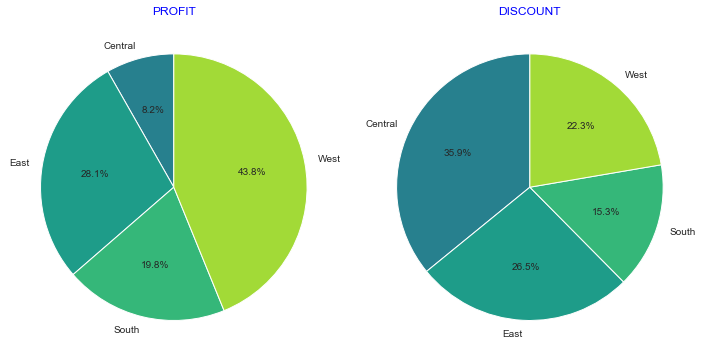

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2)
cmap = plt.get_cmap("viridis")
colors = cmap([110,140,170,220])
plt.gcf().set_size_inches(10,5)

ax1.pie(df3["Profit"], labels= df3.Region, autopct='%1.1f%%',startangle=90 , colors = colors)
ax1.set_title('PROFIT' , color = 'blue')
ax2.pie(df3["Discount"], labels= df3.Region, autopct='%1.1f%%',startangle=90 , colors = colors)
ax2.set_title('DISCOUNT' , color = 'blue')
fig.tight_layout()
plt.show()

## Conclusions
#### 1. Profit has the positive relation with Sales and Quantity while a negative correlation with Discount.
#### 2. Office Supplies has the most number of sales as well as negative profits and Blinders has the most negative profit
#### 3. Office Supplies is not performing well in Central and South Region
#### 4. Furniture is giving most negative Profit for the Sales of the Tables and Bookcases
#### 5. Furniture is not performing well in the West Region
#### 6. Technology is giving most negative Profit for the Sales of the Machines and Phones
#### 7. Technology is not performing well in the East Region
#### 8. Standard shipping mode is costing most negative profit
#### 9. Giving more Discounts has more negative returns
#### 10. Top five cities have the most number of Sales of the Furniture and Technology 